# Será que podemos comparar ideologias políticas a partir de tweets?

Aluno: Victor Souza Lopes. MBA em ciência de dados - Unifor. Introdução a Python.
email: victorsl96@gmail.com

ideologia: conjunto de convicções filosóficas, sociais, políticas etc. de um indivíduo ou grupo de indivíduos.

- análise gráfica comparativa da frequência de palavras relacionadas a tópicos: 
    religião, educação, orientação sexual, identidade de gênero, economia, saúde, porte de armas, combate a pobreza
        ex: A quantidade de vezes em que o Bolsonaro fala de drogas e segurança é muito maior que a do Lula, que mostra maior relevância desse tema na ideologia do Bolsonaro.

In [23]:
# Seção de importação dos módulos necessários
import re
import pandas as pd
import unicodedata as uni

In [24]:
def get_data():
    '''Ler os dados da fonte em JSON e retorna em um dataframe.'''
    
    # Abrir os arquivos e salvar cada um em um dataframe
    with open('dataset/jairbolsonaro.json','r') as file_01:
        df_01=pd.read_json(file_01)
    with open('dataset/LulaOficial.json','r') as file_02:
        df_02=pd.read_json(file_02)
    
    # Renomear as colunas
    df_01.rename(columns={'full_text':'Bolsonaro'}, inplace=True)
    df_02.rename(columns={'full_text':'Lula'}, inplace=True)
    
    # Concatenar os dois dataframes em um só
    cols=[df_01['Bolsonaro'], df_02['Lula']]
    dataframe=pd.concat(cols,axis=1)

    return dataframe

In [25]:
def clean(tweet):
    '''Normalizar cada palavra, remover links, hashtags, números, menções, pontuação, emogis e stopwords de um tweet e retorna uma lista com as palavras restantes'''

    stopwords=('de', 'a', 'pra', 'fazer','estar','lula','none', 'o', 'que', 'd','e', 'do', 'da', 'em', 'um', 'nao', 'para', 'e', 'com',
               'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'seu', 'sua',
               'ou', 'ser', 'quando', 'muito', 'ha', 'nos', 'ja', 'esta', 'eu', 'também', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre',
               'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estao', 'voce', 'tinha', 'foram',
               'essa', 'num', 'nem', 'suas', 'meu', 'minha', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'sera', 'tenho', 'lhe', 'deles',
               'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus',
               'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas',
               'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estavamos', 'estavam',
               'estivera', 'estiveramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivessemos', 'estivessem', 'estiver', 'estivermos',
               'estiverem', 'hei', 'ha', 'havemos', 'hao', 'houve', 'houvemos', 'houveram', 'houvera', 'houveramos', 'haja', 'hajamos', 'hajam',
               'houvesse', 'houvessemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houvera', 'houveremos', 'houverao', 'houveria',
               'houveriamos', 'houveriam', 'sou', 'somos', 'sao', 'era', 'eramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'foramos', 'seja',
               'sejamos', 'sejam', 'fosse', 'fossemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'sera', 'seremos', 'serao', 'seria', 'seriamos',
               'seriam', 'tenho', 'tem', 'temos', 'tem', 'tinha', 'tinhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tiveramos',
               'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivessemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'tera', 'teremos', 'terao',
               'teria', 'teriamos', 'teriam')

    # if para garantir que a entrada de dados para esta função seja apenas de strings. 
    if type(tweet) != str:
        tweet='none'

    # normalizar as palavras, removendo acentuação e transformar todas as letras em minúsculas
    tweet = uni.normalize('NFD', tweet).encode('ASCII', 'ignore').decode('utf-8').lower()
    
    # padrão para remover links
    url_pattern=r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'\".,<>?«»“”‘’]))'
    
    # padrão para remover hashtags
    tags_pattern=r'\#([a-zA-Z0-9_]{1,50})'
    
    # padrão para remover menções (ex: @user)
    mentions_pattern=r'\@([a-zA-Z0-9_]{1,50})'    
    
    # remover símbolos, pontuação e números
    rest_pattern=r'[^\w\s]+|\d+'
    
    # compilar os padrões de regex em um só
    patterns=re.compile('|'.join([url_pattern,tags_pattern,mentions_pattern,rest_pattern]))

    # substituir todos os objetos encontrados pelos padrões por strings vazias
    tweet = re.sub(patterns,'',tweet)

    # retornar uma lista com as palavras restantes sem as stopwords
    clean_tweet=[word for word in tweet.split() if word not in stopwords]
    
    return clean_tweet

In [26]:
def count_words(tweets):
    '''Contar a frequência de palavras nos tweets e retorna uma lista de conjuntos com a palavra e a frequência nos tweets'''

    words={}

    for tweet in tweets:
        for word in clean(tweet):
            if word in words.keys():
                words[word] += 1
            else:
                words[word] = 1

    return sorted(words.items(),key= lambda x:x[1], reverse=True)

In [27]:
def filter_data(data,themes):
    '''Filtrar a lista de conjuntos com base em um ou mais temas e retorna uma lista com os temas escolhidos'''

    result=[]
    
    for theme in themes:
        for set in data:
            if theme in set:
                result.append(set)
    
    return result


In [28]:
# salvar dataframe com tweets em uma variável
data = get_data()

# separar os dados do Bolsonaro e do Lula em variáveis diferentes
b_data = data['Bolsonaro'] #lista de tweets
l_data = data['Lula'] #lista de tweets

# as duas variáveis seguintes guardam todas as palavras chave (função de clean() é chamada pela função count_words())
b_count = count_words(b_data) #lista de conjuntos (keyword, ocurrence)
l_count = count_words(l_data) #lista de conjuntos (keyword, ocurrence)

In [29]:
# esta variável está em uma célula separada para facilitar alterações, adicionando ou removendo temas sem precisar reatribuir os valores de outras variáveis
themes = ['saude', 'educacao', 'drogas', 'seguranca', 'economia', 'moradia', 'corrupcao', 'inclusao','armas','pobreza']

In [30]:
# as variáveis d1 e d2 guardam as palavras filtradas pela função filter_data()
d1 = filter_data(b_count,themes)
d2 = filter_data(l_count,themes)

# trasformar os dados de cada um em um dataframe
df1 = pd.DataFrame(d1,columns=['Palavra','Bolsonaro'])
df2 = pd.DataFrame(d2,columns=['Palavra','Lula'])

# combinar os dois dataframes em um só para a plotagem no gráfico
df = df1.set_index('Palavra').join(df2.set_index('Palavra'))

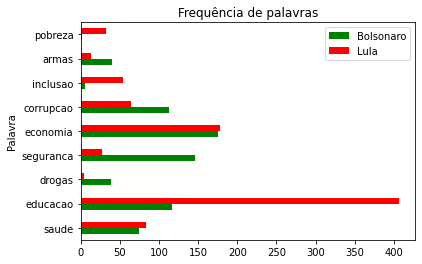

In [33]:
# gráfico de barras da frequência de palavras
ax = df.plot.barh(color={'Bolsonaro':'green','Lula':'red'}, title='Frequência de palavras')